<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/1.4%20Principal%20Component%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4. Principal Component Analysis
_________________________________
**Used for dimensionality reduction**

### Key Concepts:
* Singular Value Decomposition
* Low-Rank Matrix Approximations
* Principal Component Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image

#### Global Variables

In [2]:
# Generate a random mxn matrix
m = 4
n = 5
A = np.random.randint(100, size=(m, n))

print(f"Random {m}x{n} Matrix A:")
print(A)

Random 4x5 Matrix A:
[[49 52 60 54 27]
 [57 99 45  0 54]
 [20 32 45 44 20]
 [17  9 40 42 86]]


## Singular Value Decomposition

Eigendecomposition can only be done for Square matrices.
Singular Value Decomposition (**SVD**) can be used to decompose every matrix, regardless of shape,
or if the eigenvalues are complex or if the eigenvectors are not orthogonal.

SVD Model:
$ A = U \Sigma V ^T $

where:
* $A$: is the Input Matrix. Also referred to using $M$.
* $U$: is an Orthogonal Matrix.
* $\Sigma$: is a Diagonal Matrix. Also referred to using $D$.
* $V$: is an Orthogonal Matrix.

**Time Complexity** is $ O(mn \min\{m,n\}) $, which is computationally expensive.


In [3]:
# Singular Value Decomposition Visualization
svd_url = r"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1024px-Singular_value_decomposition_visualisation.svg.png"
display(Image(url=svd_url, width=300, unconfined=True))

In [4]:
def svd(A: np.ndarray):
    """
    Singular Value Decomposition
    :param A: Matrix A
    :return: (U, D, V)
    """
    At = A.transpose()

    # Compute the Eigenvalues and Eigenvectors of AAt
    L, U = np.linalg.eig(np.dot(A, At))
    # U is the matrix of eigenvectors

    # D is the squareroot of eigenvalues
    D = np.sqrt(L)
    # Remove 0 elements
    D = D[D != 0]
    # Sort
    D[::-1].sort()

    # Compute the Eigenvalues and Eigenvectors of AtA
    _, V = np.linalg.eig(np.dot(At, A))

    return U, D, V

In [5]:
UA, DA, VA = svd(A)

print(f"Orthogonal Matrix U:\n{UA}\n")
print(f"Diagonal Matrix D:  \n{DA}\n")
print(f"Orthogonal Matrix V:\n{VA}\n")

Orthogonal Matrix U:
[[ 0.5410226   0.59349768 -0.59428658  0.04334162]
 [ 0.62561897 -0.10028542  0.42210945 -0.64835743]
 [ 0.35830373 -0.79614242 -0.45636847  0.17176582]
 [ 0.43302873  0.06213352  0.51026943  0.7404395 ]]

Diagonal Matrix D:  
[196.07966439  75.72946419  54.59435234   9.65764776]

Orthogonal Matrix V:
[[ 0.3911571   0.24838214 -0.10097369 -0.87998019 -0.02723272]
 [ 0.53770202  0.65724959  0.01601936  0.41249519  0.32937914]
 [ 0.47969802 -0.14223599 -0.30750569  0.23236004 -0.77531142]
 [ 0.32215371 -0.54135604 -0.56306873  0.03849634  0.53350002]
 [ 0.47326468 -0.43935391  0.76022467 -0.00307099  0.07097674]]



### Verify with np.linalg.svg

In [6]:
UA, DA, VA = np.linalg.svd(A)

print(f"Orthogonal Matrix U:\n{UA}\n")
print(f"Diagonal Matrix D:  \n{DA}\n")
print(f"Orthogonal Matrix V:\n{VA}\n")

Orthogonal Matrix U:
[[-0.5410226   0.04334162  0.59428658 -0.59349768]
 [-0.62561897 -0.64835743 -0.42210945  0.10028542]
 [-0.35830373  0.17176582  0.45636847  0.79614242]
 [-0.43302873  0.7404395  -0.51026943 -0.06213352]]

Diagonal Matrix D:  
[196.07966439  75.72946419  54.59435234   9.65764776]

Orthogonal Matrix V:
[[-0.3911571  -0.53770202 -0.47969802 -0.32215371 -0.47326468]
 [-0.24838214 -0.65724959  0.14223599  0.54135604  0.43935391]
 [ 0.10097369 -0.01601936  0.30750569  0.56306873 -0.76022467]
 [-0.87998019  0.41249519  0.23236004  0.03849634 -0.00307099]
 [ 0.02723272 -0.32937914  0.77531142 -0.53350002 -0.07097674]]



### Performance comparison

In [7]:
%%timeit -n 100
svd(A)

113 µs ± 36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit -n 100
np.linalg.svd(A)

19.7 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**np.linalg.svd is ~4x faster than the custom svd implementation.**

## Low-Rank Matrix Approximations
**Applications**:
* Dimensionally reduces matrices and generate a (lossy) compressed version.
* Solve optimization problems
* Matrix completion

#### Ranks
Rank-0: Zero matrix
Rank-1: Rows are multiple of each other
Rank-2: Sum of 2 Rank-1 matrices
Rank-K: Sum of K Rank-1 matrices and cannot be simplified to less than k-1 Rank-1 matrices

### Computing a low-rank approximation
1. Compute SVD
2. Keep k left vectors of U
3. Keep k diagonal values of S
4. Keep k top vectors of V

We essentially retain the k most important values of a vector A
    where $k \le m \le n$

**Choosing the right k value**
The sum of the top k singular values should be at least c times the sum of the other singular values

## Image Compression Demo

In [9]:
from PIL import Image

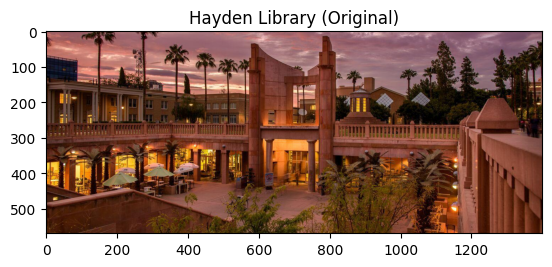

Original Image Size: (1400, 570)


In [10]:
# Load image of Hayden Library
hayden = Image.open("img/hayden_library.jpeg")
hsz = hayden.size

plt.figure()
plt.imshow(hayden)
plt.title("Hayden Library (Original)")
plt.show()

# Print image size
print(f"Original Image Size: {hsz}")

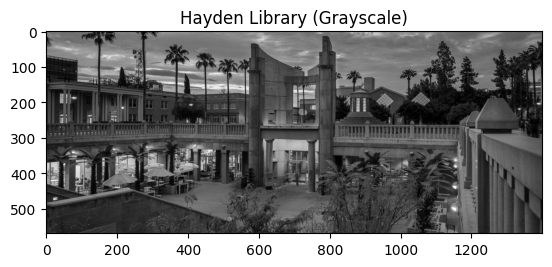

In [11]:
# Convert to Grayscale
hg = hayden.convert("LA")

# Construct Numpy array of the R-band
ha = np.array(list(hg.getdata(band=0)), float)

# Resize
ha.shape = (hsz[1], hsz[0])

# Display image
plt.figure()
plt.imshow(ha, cmap="gray")
plt.title("Hayden Library (Grayscale)")
plt.show()

#### Compute SVD

In [12]:
hu, hd, hv = np.linalg.svd(ha)

# Compare sizes
print("SVD Array Sizes")
print(f"U: {hu.shape}")
print(f"D: {hd.shape}")
print(f"V: {hv.shape}")

print(f"\nOriginal Image Size: {(hu.nbytes + hd.nbytes + hv.nbytes)/2**20:.2f} mB")

SVD Array Sizes
U: (570, 570)
D: (570,)
V: (1400, 1400)

Original Image Size: 17.44 mB


### Compress Image

**Note**: Image sizes are going to be much larger than the .jpeg file.
This is because we uncompress the file and process the data as a large array of pixels.

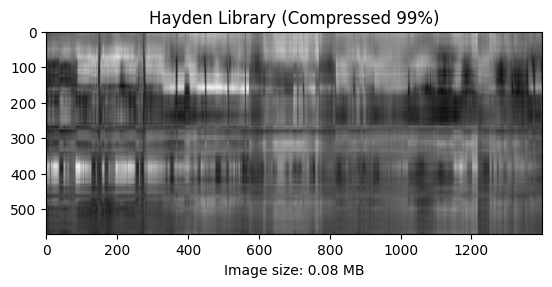

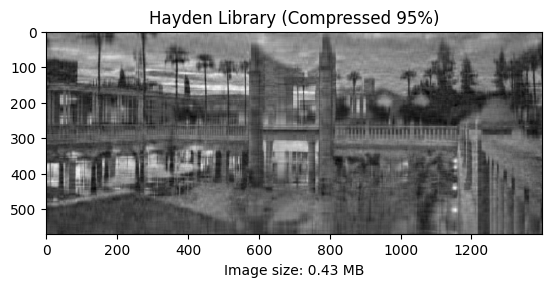

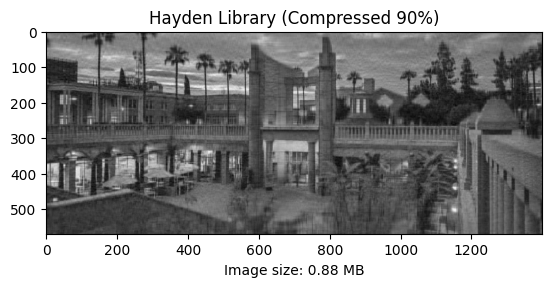

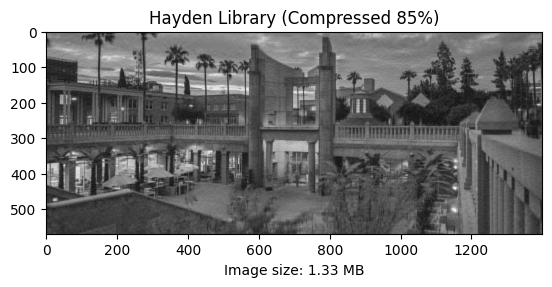

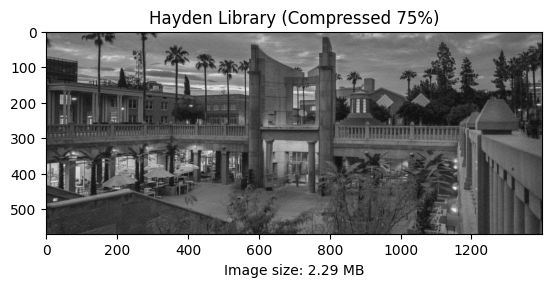

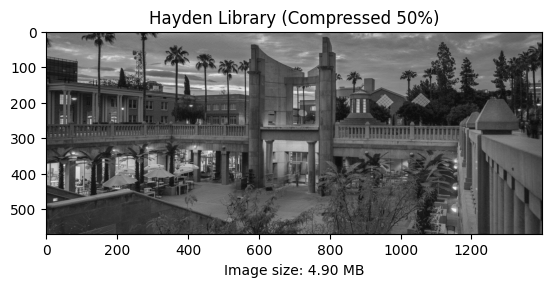

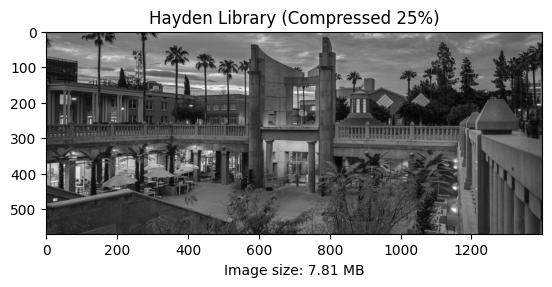

In [14]:
compressions = [1, 5, 10, 15, 25, 50, 75]

for i, r in enumerate([min(hsz) * c // 100 for c in compressions]):
    # Compress image
    hur = np.matrix(hu[:,:r])
    hdr = np.diag(hd[:r])
    hvr = np.matrix(hv[:r,:])
    hac = hur * hdr * hvr

    # Display image
    plt.figure()
    plt.imshow(hac, cmap="gray")
    plt.title(f"Hayden Library (Compressed {100-compressions[i]}%)")
    plt.xlabel(f"Image size: {(hur.nbytes + hdr.nbytes + hvr.nbytes)/2**20:.2f} MB", ha="center")
    plt.show()

## Principal Component Analysis
PCA is a dimensionality-reduction method.
It is used to reduces the size and variables of a large data sets while preserving as much information as possible.

### Computing PCA
1. **Standardize Variables**: make variables equally weighted (in terms of range) to prevent one variable from dominating over others.
    $ z = \frac {v - \bar v} {\sigma} $

2. **Compute Covariance Matrix**: compare the relationships between the variables. Helps identify and reduce closely related variables.

3. **Identify the Principal Components**: compute the eigenvectors and eigenvalues of the covariance matrix to determine the Principal Components of the data.

4. **Generate Feature Vector**: Generates the weights for each of the selected Principal Components.

5. **Project Data on the Principal Component Axes**: Remodel and fit the data to the generated Principal Components and Feature Vectors.
